# Optimizing production and revenue by simplex

### loading packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pulp

In [2]:
%matplotlib inline

### Defining you problem

In [3]:
res_1 = {'A':2, 'B':3, 't':30, 'n':2}
res_2 = {'A':3, 'B':2, 't':30, 'n':2}
res_3 = {'A':3, 'B':3, 't':22, 'n':3}
res = {'res_1':res_1, 'res_2':res_2, 'res_3':res_3}
profit_A = 3000
profit_B = 2500

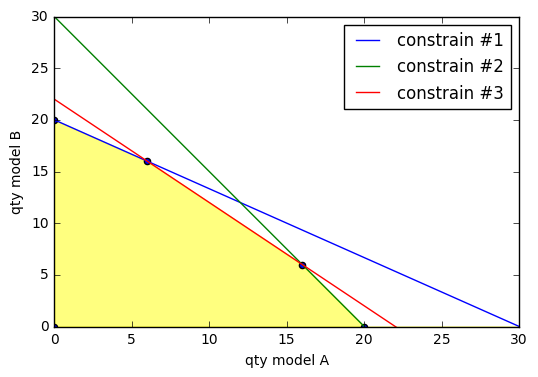

In [4]:
a = np.linspace(0, 30, 30)
c1 = ((res['res_1']['t'] * res['res_1']['n'])-
      res['res_1']['A']*a) / res['res_1']['B']
c2 = ((res['res_2']['t'] * res['res_2']['n'])-
      res['res_2']['A']*a) / res['res_2']['B']
c3 = ((res['res_3']['t'] * res['res_3']['n'])-
      res['res_3']['A']*a) / res['res_3']['B']

plt.plot(a, c1, label='constrain #1')
plt.plot(a, c2, label='constrain #2')
plt.plot(a, c3, label='constrain #3')

axes = plt.gca()
axes.set_xlim([0,30])
axes.set_ylim([0,30])
plt.xlabel('qty model A')
plt.ylabel('qty model B')

border = np.array((c1,c2,c3)).min(axis=0)

plt.fill_between(a, border, color='yellow', alpha=0.5)
plt.scatter(*zip(*[(0,0), (20,0), 
                   (0,20), (16,6), (6,16)]))
plt.legend()
plt.show()

In [5]:
model = pulp.LpProblem("Max profit", pulp.LpMaximize)
A = pulp.LpVariable('A', lowBound=0)
B = pulp.LpVariable('B', lowBound=0)

In [6]:
model += profit_A * A + profit_B * B

In [7]:
model += res['res_1']['A'] * A + res['res_1']['B'
            ] * B <= res['res_1']['t'] * res['res_1']['n']
model += res['res_2']['A'] * A + res['res_2']['B'
            ] * B <= res['res_2']['t'] * res['res_2']['n']
model += res['res_3']['A'] * A + res['res_3']['B'
            ] * B <= res['res_3']['t'] * res['res_3']['n']

In [8]:
model.solve()
print ('Completion status: %s' 
       % pulp.LpStatus[model.status])

Completion status: Optimal


In [9]:
print ("Production of model A = %0.1f" % A.varValue)
print ("Production of model B = %0.1f" % B.varValue)

Production of model A = 16.0
Production of model B = 6.0


In [10]:
print ('Maximum profit achieved: %0.1f' 
       % pulp.value(model.objective))

Maximum profit achieved: 63000.0
